In [92]:
english = ['emily','olivia','elijah','alexander','isaac']
indian = ['arav','riya','esha','oviya','aanya']
japanese = ["hiroshi","kenji","satoshi","ryo","haruki"]
arabic = ["jaml","khalid","rodwan","youssef","zainab"]
fn     = ["aapistsin","oomahkaakioyiis","aakaotsimaaki","aatskaapii"]
name_pairs = [("english",english),("indian",indian),("japanese",japanese),("arabic",arabic),("fn",fn)]
all_names = [(y[0],x) for y in name_pairs for x in y[1]]
consonants = "bcdfghjklmnpqrstvwxyz"
vowels = "aeiouy"
colors = ["red","blue","green","purple","grey"]

In [93]:
all_names

[('english', 'emily'),
 ('english', 'olivia'),
 ('english', 'elijah'),
 ('english', 'alexander'),
 ('english', 'isaac'),
 ('indian', 'arav'),
 ('indian', 'riya'),
 ('indian', 'esha'),
 ('indian', 'oviya'),
 ('indian', 'aanya'),
 ('japanese', 'hiroshi'),
 ('japanese', 'kenji'),
 ('japanese', 'satoshi'),
 ('japanese', 'ryo'),
 ('japanese', 'haruki'),
 ('arabic', 'jaml'),
 ('arabic', 'khalid'),
 ('arabic', 'rodwan'),
 ('arabic', 'youssef'),
 ('arabic', 'zainab'),
 ('fn', 'aapistsin'),
 ('fn', 'oomahkaakioyiis'),
 ('fn', 'aakaotsimaaki'),
 ('fn', 'aatskaapii')]

In [94]:
def _count_x(word,x):
    return len([i for i in word if i in x])
def count_consonants(word):
    return _count_x(word, consonants)
def count_vowels(word):
    return _count_x(word, vowels)

In [95]:
print(list(count_consonants(n) for n in english))

[3, 2, 3, 5, 2]


In [96]:
def _count_unique(word,x):
    return len(set(i for i in word if i in x))
def count_unique_consonants(word):
    return _count_unique(word, consonants)
def count_unique_vowels(word):
    return _count_unique(word, vowels)

In [39]:
print(count_unique_consonants("wwwwwwwwwwwwwipeout"))
print(count_unique_vowels("wwwwwwwwwwwwwipeout"))

3
4


In [97]:
# map types of names to a number
types = [i[0] for i in name_pairs]
type_to_index = dict(zip(types,range(len(types))))
type_to_index

{'english': 0, 'indian': 1, 'japanese': 2, 'arabic': 3, 'fn': 4}

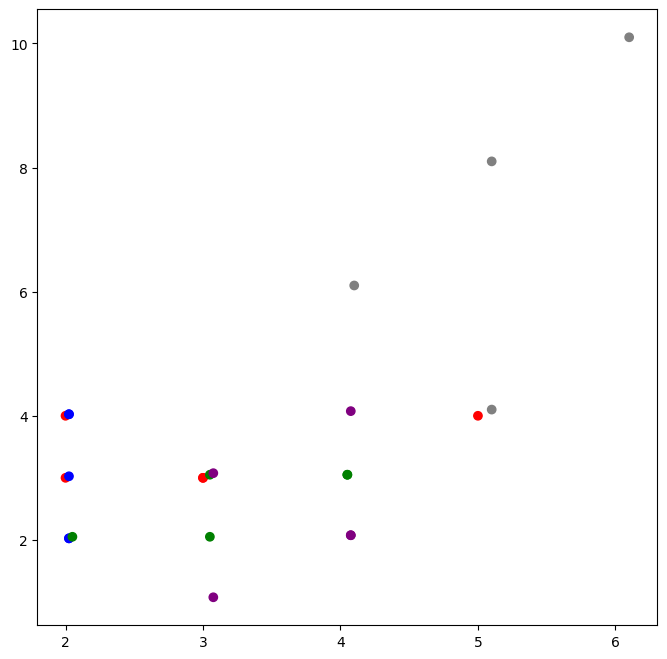

In [98]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
nudge = 0.025 # nudge offsets points by their class so we can see them
x = [count_consonants(name) + nudge*type_to_index[label] for label,name in all_names]
y = [count_vowels(name) + nudge*type_to_index[label] for label,name in all_names]
label = [colors[type_to_index[label]] for label,name in all_names]
fig = plt.figure(figsize=(8,8))
plt.scatter(x, y, c=label)

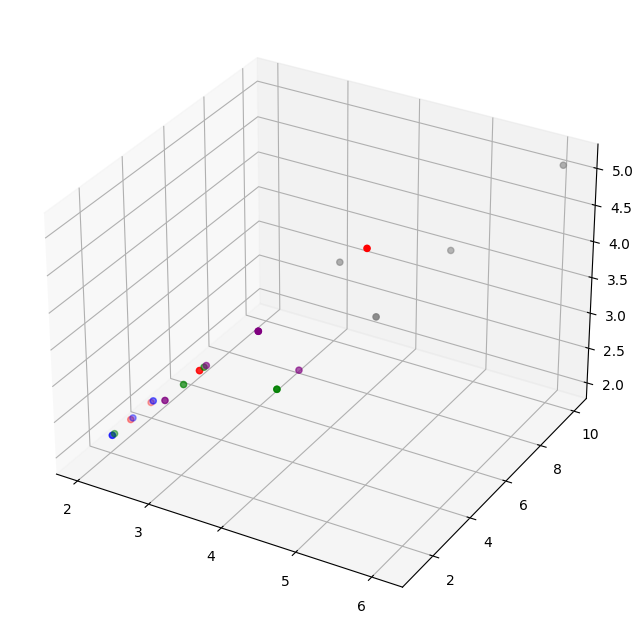

In [99]:
nudge = 0.025 # nudge offsets points by their class so we can see them
x = [count_consonants(name) + nudge*type_to_index[label] for label,name in all_names]
y = [count_vowels(name) + nudge*type_to_index[label] for label,name in all_names]
z = [count_unique_consonants(name) + nudge*type_to_index[label] for label, name in all_names]
label = [colors[type_to_index[label]] for label,name in all_names]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c=label)
plt.show()

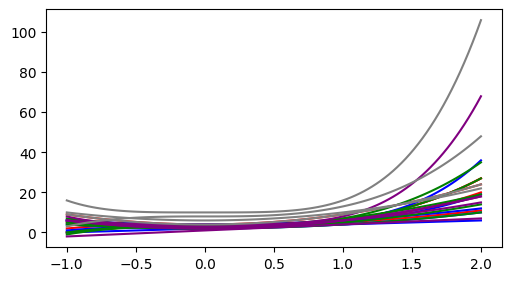

In [100]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-1, 2, 100)  # Sample data 0 to 4
def f(name,x):
    return count_consonants(name)*x**(count_unique_vowels(name)) + count_vowels(name)

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
#ax.plot(x,x,label="x")
for label,name in all_names:    
    xi = [f(name,i) for i in x]
    ax.plot(x,xi,c=colors[type_to_index[label]%len(colors)])
# ax.legend()

In [101]:
def demo_f(f):
    x = np.linspace(-1, 2, 100)  # Sample data 0 to 4
    fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
    #ax.plot(x,x,label="x")
    for label,name in all_names:    
        xi = [f(name,i) for i in x]
        ax.plot(x,xi,c=colors[type_to_index[label]%len(colors)])


/tmp/ipykernel_586411/3480921250.py:8: RuntimeWarning: invalid value encountered in scalar power
  return count_vowels(name) * x**(1/count_unique_vowels(name))+count_consonants(name)
/tmp/ipykernel_586411/3480921250.py:10: RuntimeWarning: invalid value encountered in scalar power
  return count_consonants(name) * x**(1/count_unique_vowels(name))+count_vowels(name)


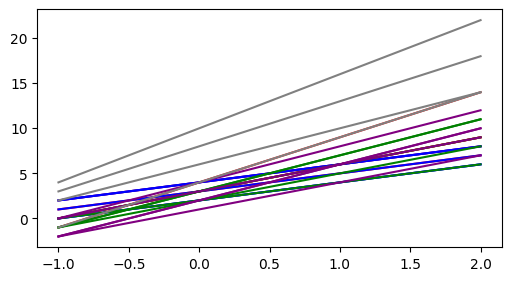

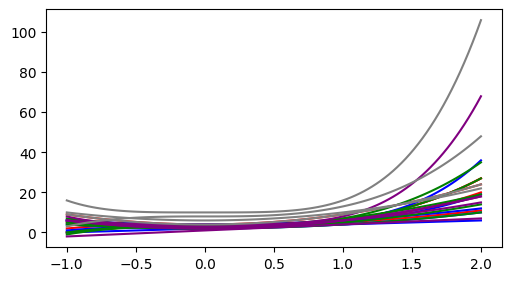

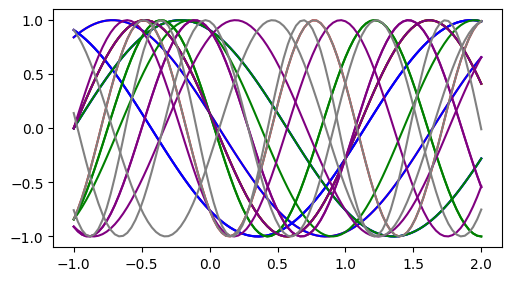

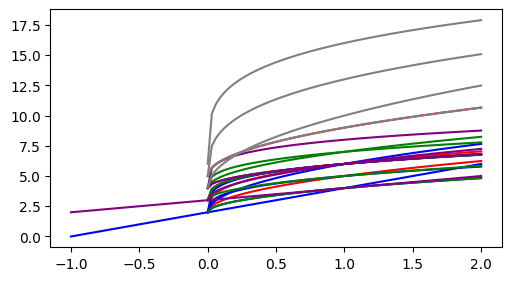

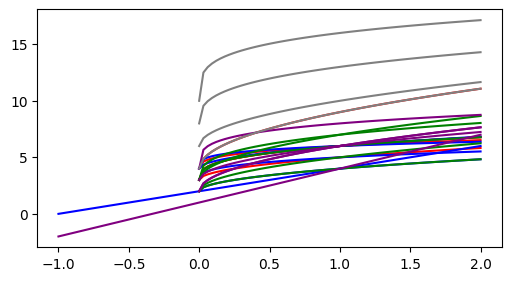

In [102]:
def f_lin(name,x):
    return count_consonants(name)*x + count_vowels(name)
def f_exp(name,x):
    return count_consonants(name)*x**(count_unique_vowels(name)) + count_vowels(name)
def f_sin(name,x):
    return math.sin(count_consonants(name)*x + count_vowels(name))
def f_sqrt(name,x):
    return count_vowels(name) * x**(1/count_unique_vowels(name))+count_consonants(name)
def f_sqrtr(name,x):
    return count_consonants(name) * x**(1/count_unique_vowels(name))+count_vowels(name)


demo_f(f_lin)
demo_f(f_exp)
demo_f(f_sin)
demo_f(f_sqrt)
demo_f(f_sqrtr)

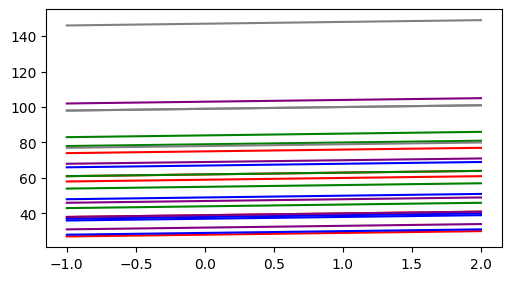

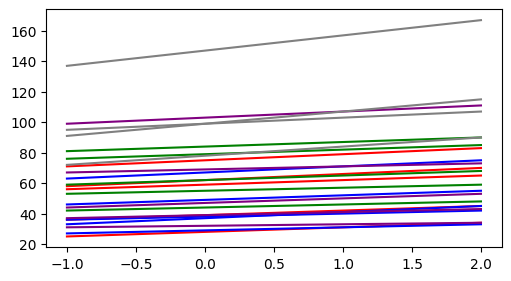

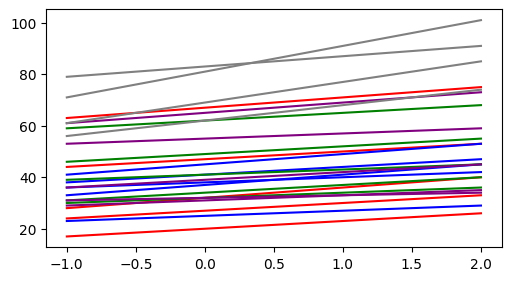

In [103]:
def sum_name(name):
    return sum([ord(x)-ord('a') for x in name])
def sum_only_consonants(name):
    return sum([ord(x)-ord('a') for x in name if x in consonants])
def f_name(name,x):
    return x + sum_name(name)
def f_name_v(name,x):
    return count_vowels(name) * x  + sum_name( name )
def f_name_v_only(name,x):
    return count_vowels(name) * x  + sum_only_consonants( name )

demo_f(f_name)
demo_f(f_name_v)
demo_f(f_name_v_only)